# Check wheather the students are eligible to enroll in the college or not 


In [1]:
#load libraries
import pandas as pd
import numpy as np
import tensorflow 
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [2]:
#load dataset
data = pd.read_csv("C:\\Users\\rajka\\OneDrive\\Desktop\\All Folders\\datasets\\Admission Dataset\\Admission_Predict_Ver1.1.csv")

In [3]:
data.head()
#here GRE and Tofel are the score of the papers given by the students for entrance

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


#do some analysis

In [4]:
#the GRE Exam  results out of 340
data['GRE Score'].mean()
data['GRE Score'].max()


340

In [5]:
#the TOFEL Exam  results out of 120
data['TOEFL Score'].mean()
data['TOEFL Score'].max()


120

In [6]:
#check CGPA 
data['CGPA'].mean()
data['CGPA'].max()

9.92

In [7]:
#SOP = Statement of Purpose
#LOR = Letter of Recommendation 
#Research = means have Research Experience or not (yes= 1 , no = 0)
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
#check missing values
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [10]:
null_val = np.where(data['CGPA'].isnull(),1,0)
print(null_val)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [52]:
#check duplicate rows
data.duplicated().sum()

np.int64(0)

In [53]:
#delete serial number column as no use
data.drop(columns =['Serial No.'],axis=1,inplace= True)

In [61]:
#select input and target features
X = data.drop(columns=['Chance of Admit '])
y = data['Chance of Admit ']

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state=42)

#scale the values using MinMax Scaler 
 - #why min_max_scaler = because we know the upper and lower bound (min and max values of the features) so it is easy that's  - why other wise we will use standard Scaler

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Build Neural Network 
----------------------------------------------------------------------------------------------------------------------------

In [142]:
model = Sequential()
model.add(Dense(7,activation='relu',input_dim=7)) #7 inputs in dense layer 1 
model.add(Dense(1,activation='linear'))

#NOTE : for regression problem activation fucnction of output layer is always must be linear 
          


D:\miniconda\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [143]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                     │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 64 (256.00 B)

 Trainable params: 64 (256.00 B)

 Non-trainable params: 0 (0.00 B)

In [144]:
#compile the model
model.compile(loss='mean_squared_error',optimizer='Adam')

#NOte : we use metrics =['accuracy'] only in the classification problems

In [145]:
history= model.fit(X_train_scaled,y_train,epochs = 100,validation_split=0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.7214 - val_loss: 0.6540
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5409 - val_loss: 0.4841
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3949 - val_loss: 0.3483
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2824 - val_loss: 0.2429
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1939 - val_loss: 0.1625
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1259 - val_loss: 0.1025
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0759 - val_loss: 0.0578
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0411 - val_loss: 0.0280
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0244 - val_loss: 0.0185
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0224 - val_loss: 0.0179
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0225 - val_loss: 0.0176
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

In [146]:
y_out = model.predict(X_test_scaled)
y_out

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[0.9281156 ],
       [0.74306184],
       [0.612605  ],
       [0.6680094 ],
       [0.85770553],
       [0.8597068 ],
       [0.5570846 ],
       [0.6318652 ],
       [0.78852886],
       [0.82758784],
       [0.66051507],
       [0.68474066],
       [0.7187376 ],
       [0.9385168 ],
       [0.83798665],
       [0.5015108 ],
       [0.8358719 ],
       [0.47414798],
       [0.52701586],
       [0.53606147],
       [0.5790347 ],
       [0.5842363 ],
       [0.5922081 ],
       [0.80204046],
       [0.8557704 ],
       [0.5960601 ],
       [0.94428307],
       [0.83818746],
       [0.63850415],
       [0.6680486 ],
       [0.60352945],
       [0.64045084],
       [0.57930017],
       [0.85339886],
       [0.6420411 ],
       [0.74661213],
       [0.5595553 ],
       [0.9388553 ],
       [0.5294117 ],
       [0.6604947 ],
       [0.94727457],
       [0.45868653],
       [0.61184245],
       [0.8481948 ],
       [0.9134087 ],
       [0.5760161 ],
       [0.96245736],
       [0.840

In [147]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_out)
score

0.6844069466989482

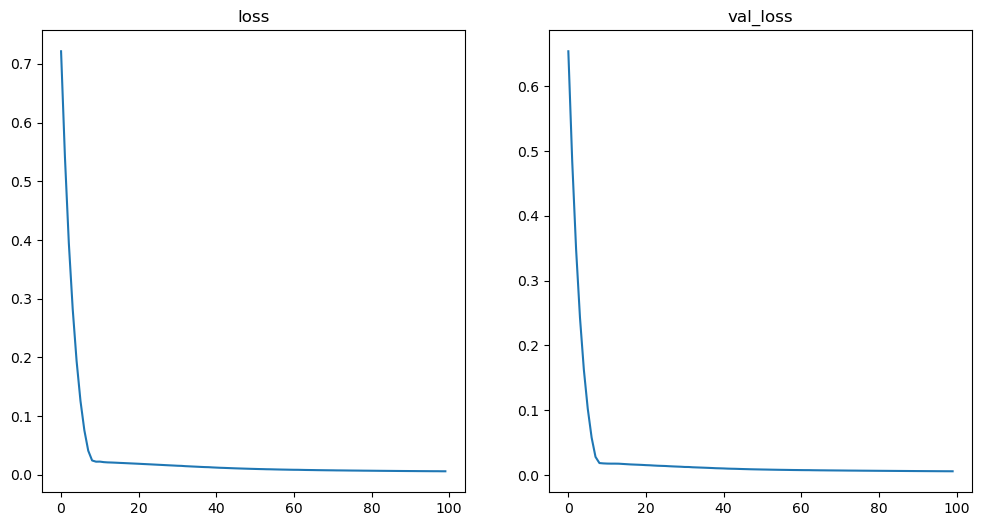

In [148]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('loss')
plt.plot(history.history['loss'])
plt.subplot(1,2,2)
plt.title('val_loss')
plt.plot(history.history['val_loss'])